In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from scipy import integrate
import warnings

# 적분에 관한 warning을 출력하지 않도록 한다
warnings.filterwarnings('ignore',
                        category=integrate.IntegrationWarning)

from itertools import combinations

In [2]:
# 폰트 파일의 경로 지정
font_path = r'C:\Windows\Fonts\gulim.ttc'

In [3]:
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont)

#### 문제 1 : 데이터셋 불러오기 및 기본 정보 확인 <hr>

- 1 - 1) Iris(붓꽃) 데이터셋을 불러오고, 데이터프레임으로 변환한 후 첫 5개 행을 출력하시오.


In [4]:
file = '../DATA/Iris.csv'

In [5]:
irisDF = pd.read_csv(file)
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- 1 - 2) 데이터프레임의 기본 정보를 확인하고, 각 열의 데이터 타입을 제시하시오.


In [6]:
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
irisDF.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

- 1 - 3) 붓꽃의 품종에 대한 클래스 분포를 확인하고, 각 클래스별 데이터 개수를 제시하시오.

In [8]:
species = irisDF.groupby('species')
species.size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

#### 문제 2 : 데이터 시각화 및 탐색 <hr>

- 2 - 1) 붓꽃 데이터셋에서 각 특성 간의 산점도(scatter plot)를 그리되, 각 클래스별로 다른 색상을 사용하여 시각화하시오.


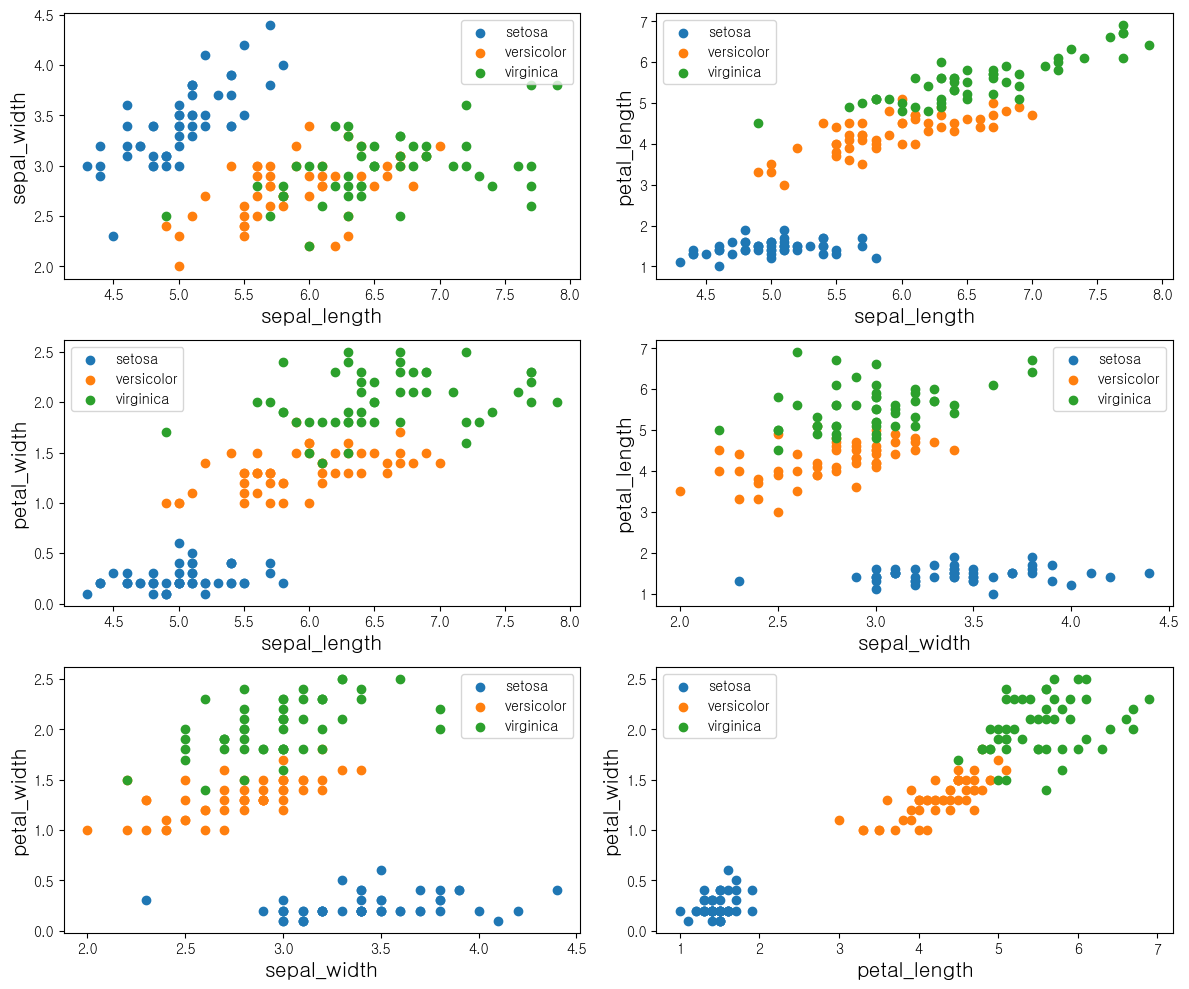

In [9]:
# plt.subplots()으로 위 결과 출력
character = list(combinations(irisDF.columns[:4], 2))
# color_list = ['purple', 'orange', 'green']
species = irisDF.groupby('species')
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))

for ind in range(6):
    for ind2 in range(3):
        df = species.get_group(irisDF['species'].unique()[ind2])
        axes[ind // 2, ind % 2].scatter(df[character[ind][0]], df[character[ind][1]], label = irisDF['species'].unique()[ind2]) 
        axes[ind // 2, ind % 2].set_xlabel(f'{character[ind][0]}', size = 15)
        axes[ind // 2, ind % 2].set_ylabel(f'{character[ind][1]}', size = 15)
        axes[ind // 2, ind % 2].legend()

plt.tight_layout()
plt.show()

- 2 - 2) 꽃받침의 길이와 꽃받침의 너비의 관계를 시각화하고, 각 클래스별로 구분하여 출력

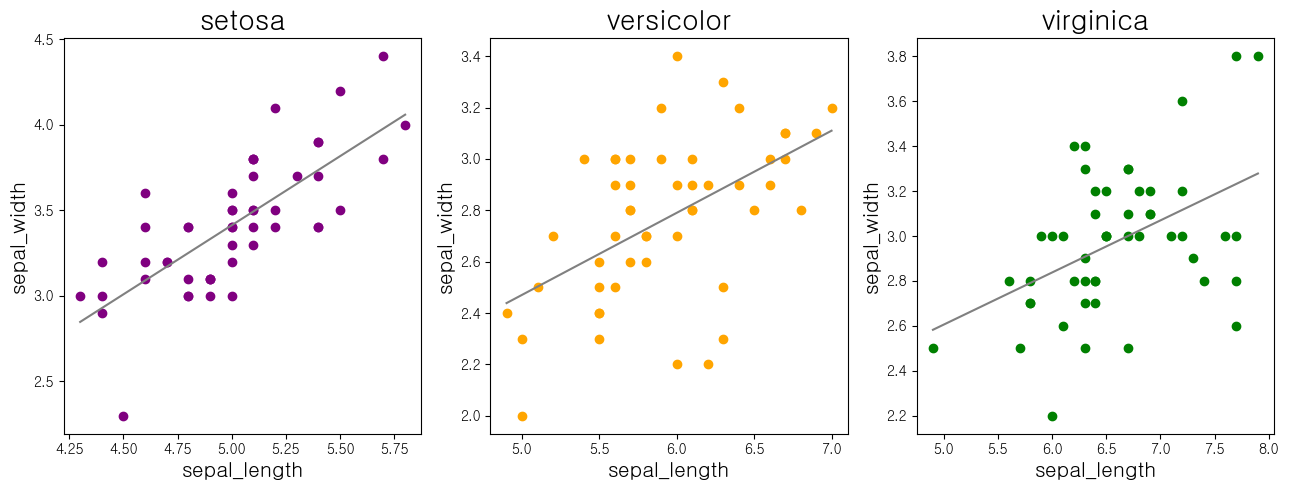

In [25]:
# 회귀 직선
color_list = ['purple', 'orange', 'green']
species = irisDF.groupby('species')
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))

for ind in range(3):
    df = species.get_group(irisDF['species'].unique()[ind])
    Sepal_Length = df['sepal_length'].values
    Sepal_Width = df['sepal_width'].values
    # 계수β_0와β_1를 구한다
    poly_fit = np.polyfit(Sepal_Length, Sepal_Width, 1)
    # β_0+β_1 x를 반환하는 함수를 작성
    poly_1d = np.poly1d(poly_fit)
    # 직선을 그리기 위해 x좌표를 생성
    xs = np.linspace(Sepal_Length.min(), Sepal_Length.max())
    # xs에 대응하는 y좌표를 구한다
    ys = poly_1d(xs)

    # 주의 : 한 줄로 출력 시 axes[0, ind]로 적으면 안된다.
    axes[ind].scatter(Sepal_Length, Sepal_Width, color = color_list[ind]) 
    axes[ind].set_xlabel(f'sepal_length', size = 15)
    axes[ind].set_ylabel(f'sepal_width', size = 15)
    axes[ind].set_title(f"{irisDF['species'].unique()[ind]}", size = 20)
    axes[ind].plot(xs, ys, color = 'gray', label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

plt.tight_layout()
plt.show()

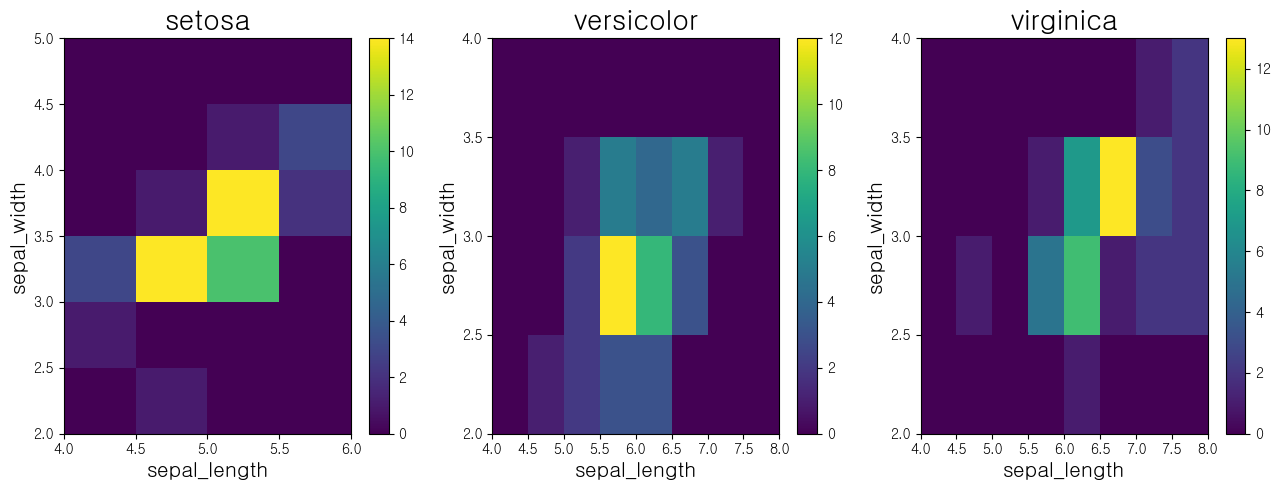

In [35]:
# 히트맵
species = irisDF.groupby('species')
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))

for ind in range(3):
    df = species.get_group(irisDF['species'].unique()[ind])
    Sepal_Length = df['sepal_length'].values
    Sepal_Width = df['sepal_width'].values
    M_length = math.floor(Sepal_Length.max()) + 1
    N_length = math.floor(Sepal_Length.min())
    M_width = math.floor(Sepal_Width.max()) + 1
    N_width = math.floor(Sepal_Width.min())
    d_length = (M_length - N_length)*2
    d_width = (M_width - N_width)*2
    c = axes[ind].hist2d(Sepal_Length, Sepal_Width, bins=[d_length, d_width], range=[(N_length, M_length), (N_width, M_width)])
    
    # 주의 : 한 줄로 출력 시 axes[0, ind]로 적으면 안된다.
    axes[ind].set_xticks(c[1])
    axes[ind].set_yticks(c[2])
    axes[ind].set_xlabel(f'sepal_length', size = 15)
    axes[ind].set_ylabel(f'sepal_width', size = 15)
    axes[ind].set_title(f"{irisDF['species'].unique()[ind]}", size = 20)
    fig.colorbar(c[3], ax = axes[ind])

plt.tight_layout()
plt.show()

#### 문제 3 : 연속확률변수 및 연속확률분포 계산 <hr>

- 3 - 1)

- 3 - 2)

- 3 - 3)